<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/400_CNN_CIFAR100_Modeling_GPU_Test_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR100 - Categorical Classification
> # Convolutional Neural Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# I. CIFAR100 Data_Set Load

In [3]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169009152/169001437 [==============================] - 4s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [4]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

* Normalization

In [5]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. MNIST Keras Modeling

> ## 1) Model Define

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          9248      
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

> ## 2) Model Compile

* 모델 학습방법 설정

In [10]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

> ## 3) Model Fit

* 약 5분

In [11]:
%%time

hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 34s 8ms/step - loss: 4.2065 - accuracy: 0.0553 - val_loss: 3.9240 - val_accuracy: 0.0942
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 3.6989 - accuracy: 0.1342 - val_loss: 3.6625 - val_accuracy: 0.1310
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 3.4406 - accuracy: 0.1793 - val_loss: 3.4345 - val_accuracy: 0.1771
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 3.2356 - accuracy: 0.2154 - val_loss: 3.1918 - val_accuracy: 0.2209
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 3.0608 - accuracy: 0.2498 - val_loss: 3.2691 - val_accuracy: 0.2211
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 2.9195 - accuracy: 0.2751 - val_loss: 3.0396 - val_accuracy: 0.2555
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 2.7979 - accuracy: 0.3018 - val_loss: 3.0971 - val_accuracy: 0.245

> ## 4) 학습 결과 시각화

* Loss Visualization

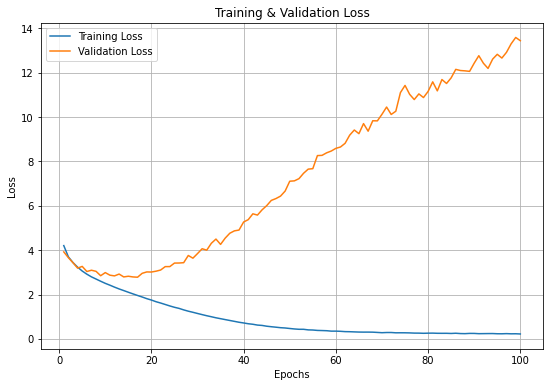

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['loss'])
plt.plot(epochs, hist_mnist.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 13.4526 - accuracy: 0.2835
Loss = 13.45261
Accuracy = 0.28350


# 
# 
# 
# The End
# 
# 
# 